# Data Preprocessing

Для построения модели кластеризации используется подготовленный ранее датасет.

Подключаем библиотеки и загружаем файл.

In [43]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Importing the dataset
df = pd.read_csv('sr2_prep.csv', sep=';')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом.

In [14]:
df

name    year     kilom    fuel      trans  \
0     Audi A4 3,2 FSI Tiptronic Quattro  2012.0  125000.0  Petrol  Automatic   
1                   Smart Fortwo CDI AT  2008.0  103000.0  Diesel  Automatic   
2                      Audi TT 2,0 TFSI  2014.0   14262.0  Petrol  Automatic   
3                      Audi TT 2,0 TFSI  2013.0   12100.0  Petrol  Automatic   
4           Porsche Boxster S tiptronic  2015.0   10512.0  Petrol  Automatic   
...                                 ...     ...       ...     ...        ...   
6014            BMW 5 Series 520d Sedan  2012.0   72000.0  Diesel  Automatic   
6015            BMW 5 Series 520d Sedan  2012.0   90000.0  Diesel  Automatic   
6016            BMW 5 Series 520d Sedan  2014.0   64158.0  Diesel  Automatic   
6017            BMW 5 Series 520d Sedan  2012.0   95000.0  Diesel  Automatic   
6018             Fiat Punto 1,3 Emotion  2011.0   45271.0  Diesel     Manual   

       owner    mileage      engine      power     seats  pricedol  
0      First  10.500000  3197.00000  113.25305  2.860699       1.0  
1     Second   4.390378   799.00000  113.25305  2.860699       0.0  
2      First   9.900000  1984.00000  207.80000  2.860699       1.0  
3      First   9.900000  1984.00000  207.80000  2.860699       1.0  
4      First   8.600000  2706.00000  265.00000  2.860699       1.0  
...      ...        ...         ...        ...       ...       ...  
6014   Third  18.480000  1621.27645  113.25305  5.278735       1.0  
6015   First  18.480000  1621.27645  113.25305  5.278735       1.0  
6016   First  18.480000  1621.27645  113.25305  5.278735       1.0  
6017  Second  18.480000  1621.27645  113.25305  5.278735       1.0  
6018   First  20.300000  1621.27645  113.25305  5.278735       0.0  

[6019 rows x 11 columns]

# K-Means Clustering

Перейдем к работе с алгоритмом К-средних. 
Сразу же удалим столбец с наименованием автомобилей, так как он имеет огромное количество уникальных значений, что не применимо в  разбиении на кластеры. Выведем на экран полностью подготовленные данные.

In [15]:
df = df.drop(['name'], axis=1)         

In [16]:
df

year     kilom    fuel      trans   owner    mileage      engine  \
0     2012.0  125000.0  Petrol  Automatic   First  10.500000  3197.00000   
1     2008.0  103000.0  Diesel  Automatic  Second   4.390378   799.00000   
2     2014.0   14262.0  Petrol  Automatic   First   9.900000  1984.00000   
3     2013.0   12100.0  Petrol  Automatic   First   9.900000  1984.00000   
4     2015.0   10512.0  Petrol  Automatic   First   8.600000  2706.00000   
...      ...       ...     ...        ...     ...        ...         ...   
6014  2012.0   72000.0  Diesel  Automatic   Third  18.480000  1621.27645   
6015  2012.0   90000.0  Diesel  Automatic   First  18.480000  1621.27645   
6016  2014.0   64158.0  Diesel  Automatic   First  18.480000  1621.27645   
6017  2012.0   95000.0  Diesel  Automatic  Second  18.480000  1621.27645   
6018  2011.0   45271.0  Diesel     Manual   First  20.300000  1621.27645   

          power     seats  pricedol  
0     113.25305  2.860699       1.0  
1     113.25305  2.860699       0.0  
2     207.80000  2.860699       1.0  
3     207.80000  2.860699       1.0  
4     265.00000  2.860699       1.0  
...         ...       ...       ...  
6014  113.25305  5.278735       1.0  
6015  113.25305  5.278735       1.0  
6016  113.25305  5.278735       1.0  
6017  113.25305  5.278735       1.0  
6018  113.25305  5.278735       0.0  

[6019 rows x 10 columns]

Перейдем к предварительной кодировке данных, для чего применим следующую функцию.

In [17]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [18]:
# Encoding categorical data
df = encoding_char(df)

In [19]:
df

year     kilom  fuel  trans  owner    mileage      engine      power  \
0     2012.0  125000.0     0      0      0  10.500000  3197.00000  113.25305   
1     2008.0  103000.0     1      0      1   4.390378   799.00000  113.25305   
2     2014.0   14262.0     0      0      0   9.900000  1984.00000  207.80000   
3     2013.0   12100.0     0      0      0   9.900000  1984.00000  207.80000   
4     2015.0   10512.0     0      0      0   8.600000  2706.00000  265.00000   
...      ...       ...   ...    ...    ...        ...         ...        ...   
6014  2012.0   72000.0     1      0      2  18.480000  1621.27645  113.25305   
6015  2012.0   90000.0     1      0      0  18.480000  1621.27645  113.25305   
6016  2014.0   64158.0     1      0      0  18.480000  1621.27645  113.25305   
6017  2012.0   95000.0     1      0      1  18.480000  1621.27645  113.25305   
6018  2011.0   45271.0     1      1      0  20.300000  1621.27645  113.25305   

         seats  pricedol  
0     2.860699       1.0  
1     2.860699       0.0  
2     2.860699       1.0  
3     2.860699       1.0  
4     2.860699       1.0  
...        ...       ...  
6014  5.278735       1.0  
6015  5.278735       1.0  
6016  5.278735       1.0  
6017  5.278735       1.0  
6018  5.278735       0.0  

[6019 rows x 10 columns]

Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['year','kilom','fuel','trans','owner','mileage','engine','power','seats','pricedol']).round()

year  kilom  fuel  trans  owner  mileage  engine  power  seats  pricedol
0      1.0    0.0   0.0    0.0    0.0      0.0     1.0    0.0    0.0       1.0
1      0.0    0.0   0.0    0.0    0.0      0.0     0.0    0.0    0.0       0.0
2      1.0    0.0   0.0    0.0    0.0      0.0     1.0    1.0    0.0       1.0
3      1.0    0.0   0.0    0.0    0.0      0.0     1.0    1.0    0.0       1.0
4      1.0    0.0   0.0    0.0    0.0      0.0     1.0    1.0    0.0       1.0
...    ...    ...   ...    ...    ...      ...     ...    ...    ...       ...
6014   1.0    0.0   0.0    0.0    1.0      1.0     0.0    0.0    1.0       1.0
6015   1.0    0.0   0.0    0.0    0.0      1.0     0.0    0.0    1.0       1.0
6016   1.0    0.0   0.0    0.0    0.0      1.0     0.0    0.0    1.0       1.0
6017   1.0    0.0   0.0    0.0    0.0      1.0     0.0    0.0    1.0       1.0
6018   0.0    0.0   0.0    1.0    0.0      1.0     0.0    0.0    1.0       0.0

[6019 rows x 10 columns]

Для того, чтобы определиться с числом выделяемых кластеров, применим метод локтя, прогнав алгоритм в цикле от 1 до 11 кластеров.
На полученном графике видно, что наибольшая скорость падения наблюдается при выделении 2 кластеров, а также видимое падение при 4-х.

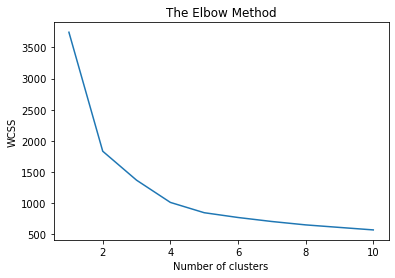

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Итак, чтобы более точно определиться с оптимальным количеством выделяемых кластеров, используем еще один метод силуэта, прогоним цикл от 2 до 8. Максимум показателя достигается на 2 и 4 кластерах, однако на 4 он немного выше, что приводит к решению выделить для дальнейшей работы все-таки 4 кластера.

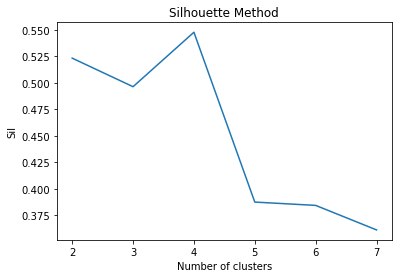

2:0.52328587665168
3:0.496348838304562
4:0.54770844259537
5:0.38754716610027495
6:0.384418381456361
7:0.3612912256775389


In [22]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Следующим шагом применим метод К-средних, выделив 4 кластера. Выведем таблицу с ядрами кластеров, округлив их значения. С помощь полученной таблицы мы можем оценить наши характеристики и понять, какие из них будут значимыми при построении модели кластеризации. Итак, мы видим что такие переменные как 'year','kilom','fuel','owner'мало вариативны по кластерам, поэтому эти данные будут точно исключены при дальнейшей работе с моделью. Вопрос вызывает переменная'seats', однако в ходе экспериментов с ее исключением/добавлением было принято решение оставить данную характеристику.

In [24]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['year','kilom','fuel','trans','owner','mileage','engine','power','seats','pricedol']).round()

year  kilom  fuel  trans  owner  mileage  engine  power  seats  pricedol
0   1.0    0.0   0.0    1.0    0.0      1.0     0.0    0.0    0.0      -0.0
1   1.0    0.0   0.0   -0.0    0.0      0.0     1.0    1.0    0.0       1.0
2   1.0    0.0   0.0    0.0    0.0      0.0     0.0    0.0    0.0      -0.0
3   1.0    0.0   0.0    1.0    0.0      0.0     1.0    0.0    1.0       1.0

Оставим в нашем наборе такие переменные: 'trans','mileage','engine','power','seats','pricedol'.

In [94]:
# Less features
X = df[:, [3, 5, 6, 7, 8, 9]]

Итак, теперь применим алгоритм К-средних, выделив все те же 4 кластера, но уже на отобранных данных. Проведем обучение на этом множестве и выведем ядра кластеров.

In [113]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['trans','mileage','engine','power','seats','pricedol']).round(2)

trans  mileage  engine  power  seats  pricedol
0    1.0     0.56    0.38   0.22   0.49      -0.0
1   -0.0     0.40    0.66   0.63   0.50       1.0
2    0.0     0.48    0.45   0.34   0.45      -0.0
3    1.0     0.44    0.60   0.40   0.68       1.0

Получаем следующие кластеры:

0-й: авто с ручной трансмиссией, меньшим пробегом, объемом двигателя, мощьностью и кол-вом сидений с низкой ценой.
1-й: авто с автоматической трансмиссией, большим пробегом, объемом двигателя, мощьностью и меньшим кол-вом сидений с высокой ценой.
2-й: авто с с автоматической трансмиссией, большим пробегом, меньшим объемом двигателя, мощьностью и кол-вом сидений с низкой ценой.
3-й: авто с ручной трансмиссией,большим пробегом, объемом двигателя, меньшей  мощьностью, большим количеством сидений с высокой ценой.

Мы получили некую базу для дальнейшего построения нейронной сети для задачи кластеризации.

# SOM

Для работы с НС Кохонена необходимо предустановить библиотеку SimpSOM.
Теперь переходим к построению базовой сетки. Для этого из импортированной библиотеки используем фукцию somNet и задаем ее параметры. Т.к. наша выборка содержит 6000 записей, то размерность для сетки зададим 20х30, следующий параметр - отобранный набор данных для обучения.
Обучение будем проводить с желаемой фиксацией потерь равной 1% в течение 1000 итераций.
Эти параметры были отобраны путем множества экспериментов с размерами сетки и количеством итераций. С увеличением/уменьшением числа итераций процент пересечения результатов с моделью к-средних снижался, а интерпретация становилась более затруднительной, поэтому я выбрала довольно низкое число итераций.

In [96]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 1000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


Итак, наша сеть обучилась, теперь построим набор карт по столбцам и проведем их совмесный анализ.

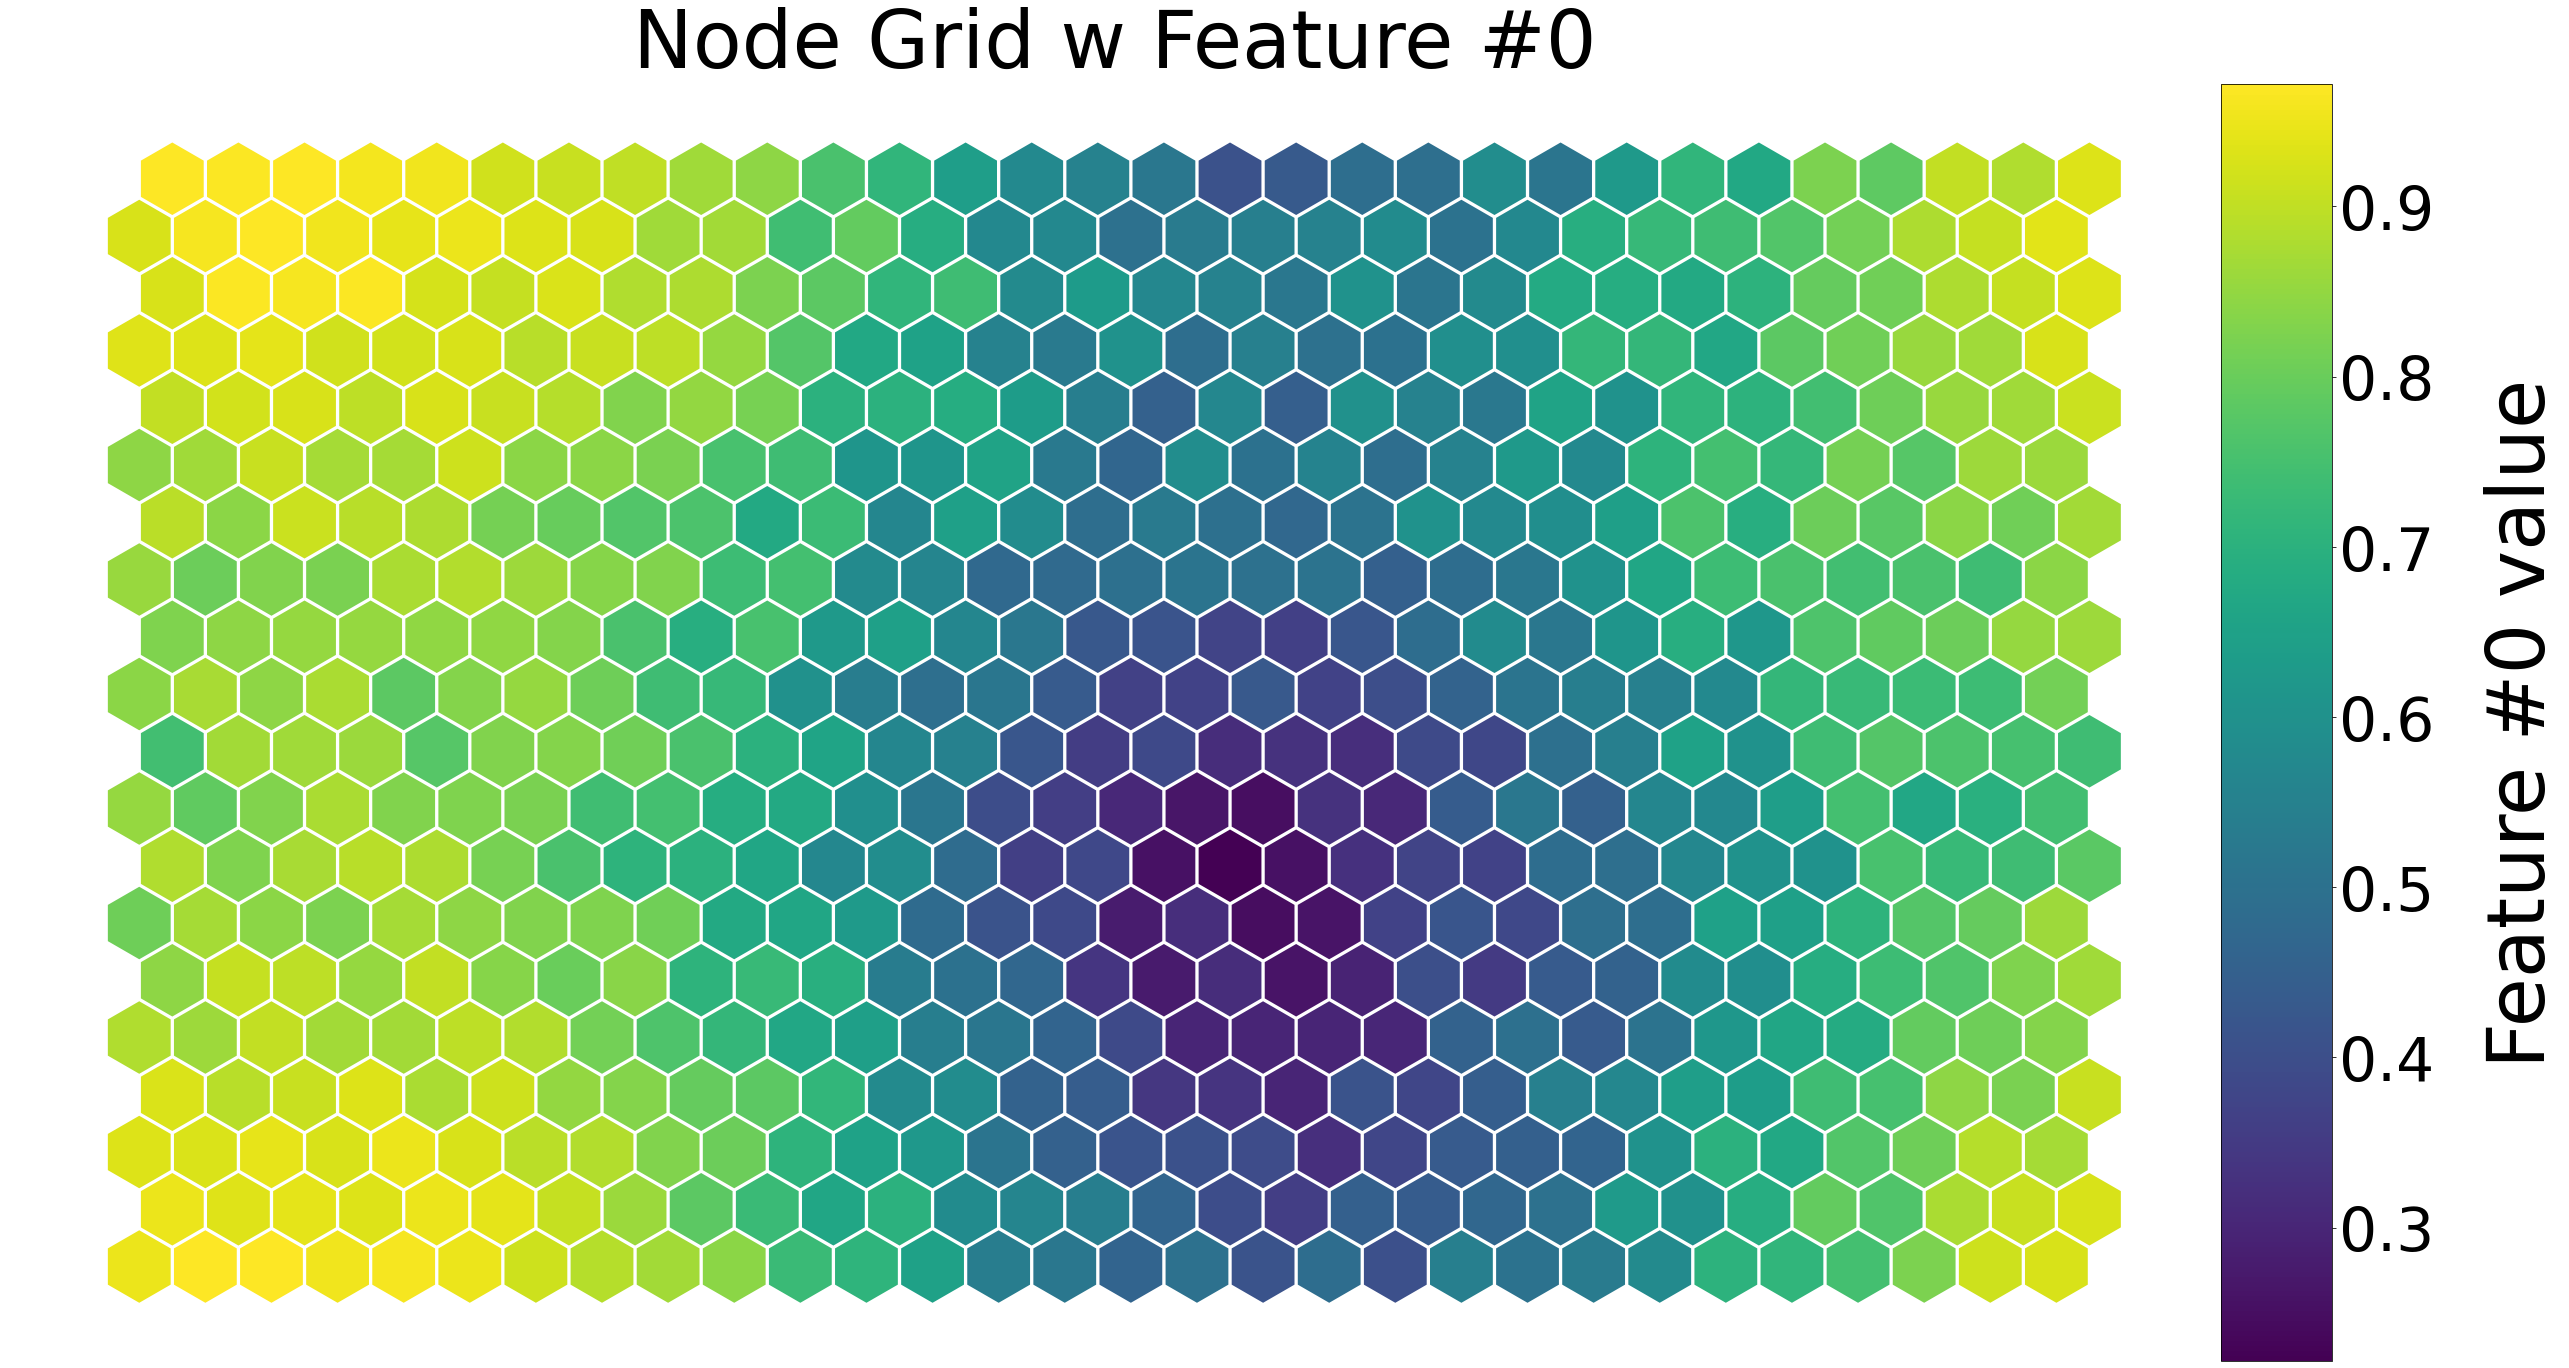

In [97]:
net.nodes_graph(colnum=0)

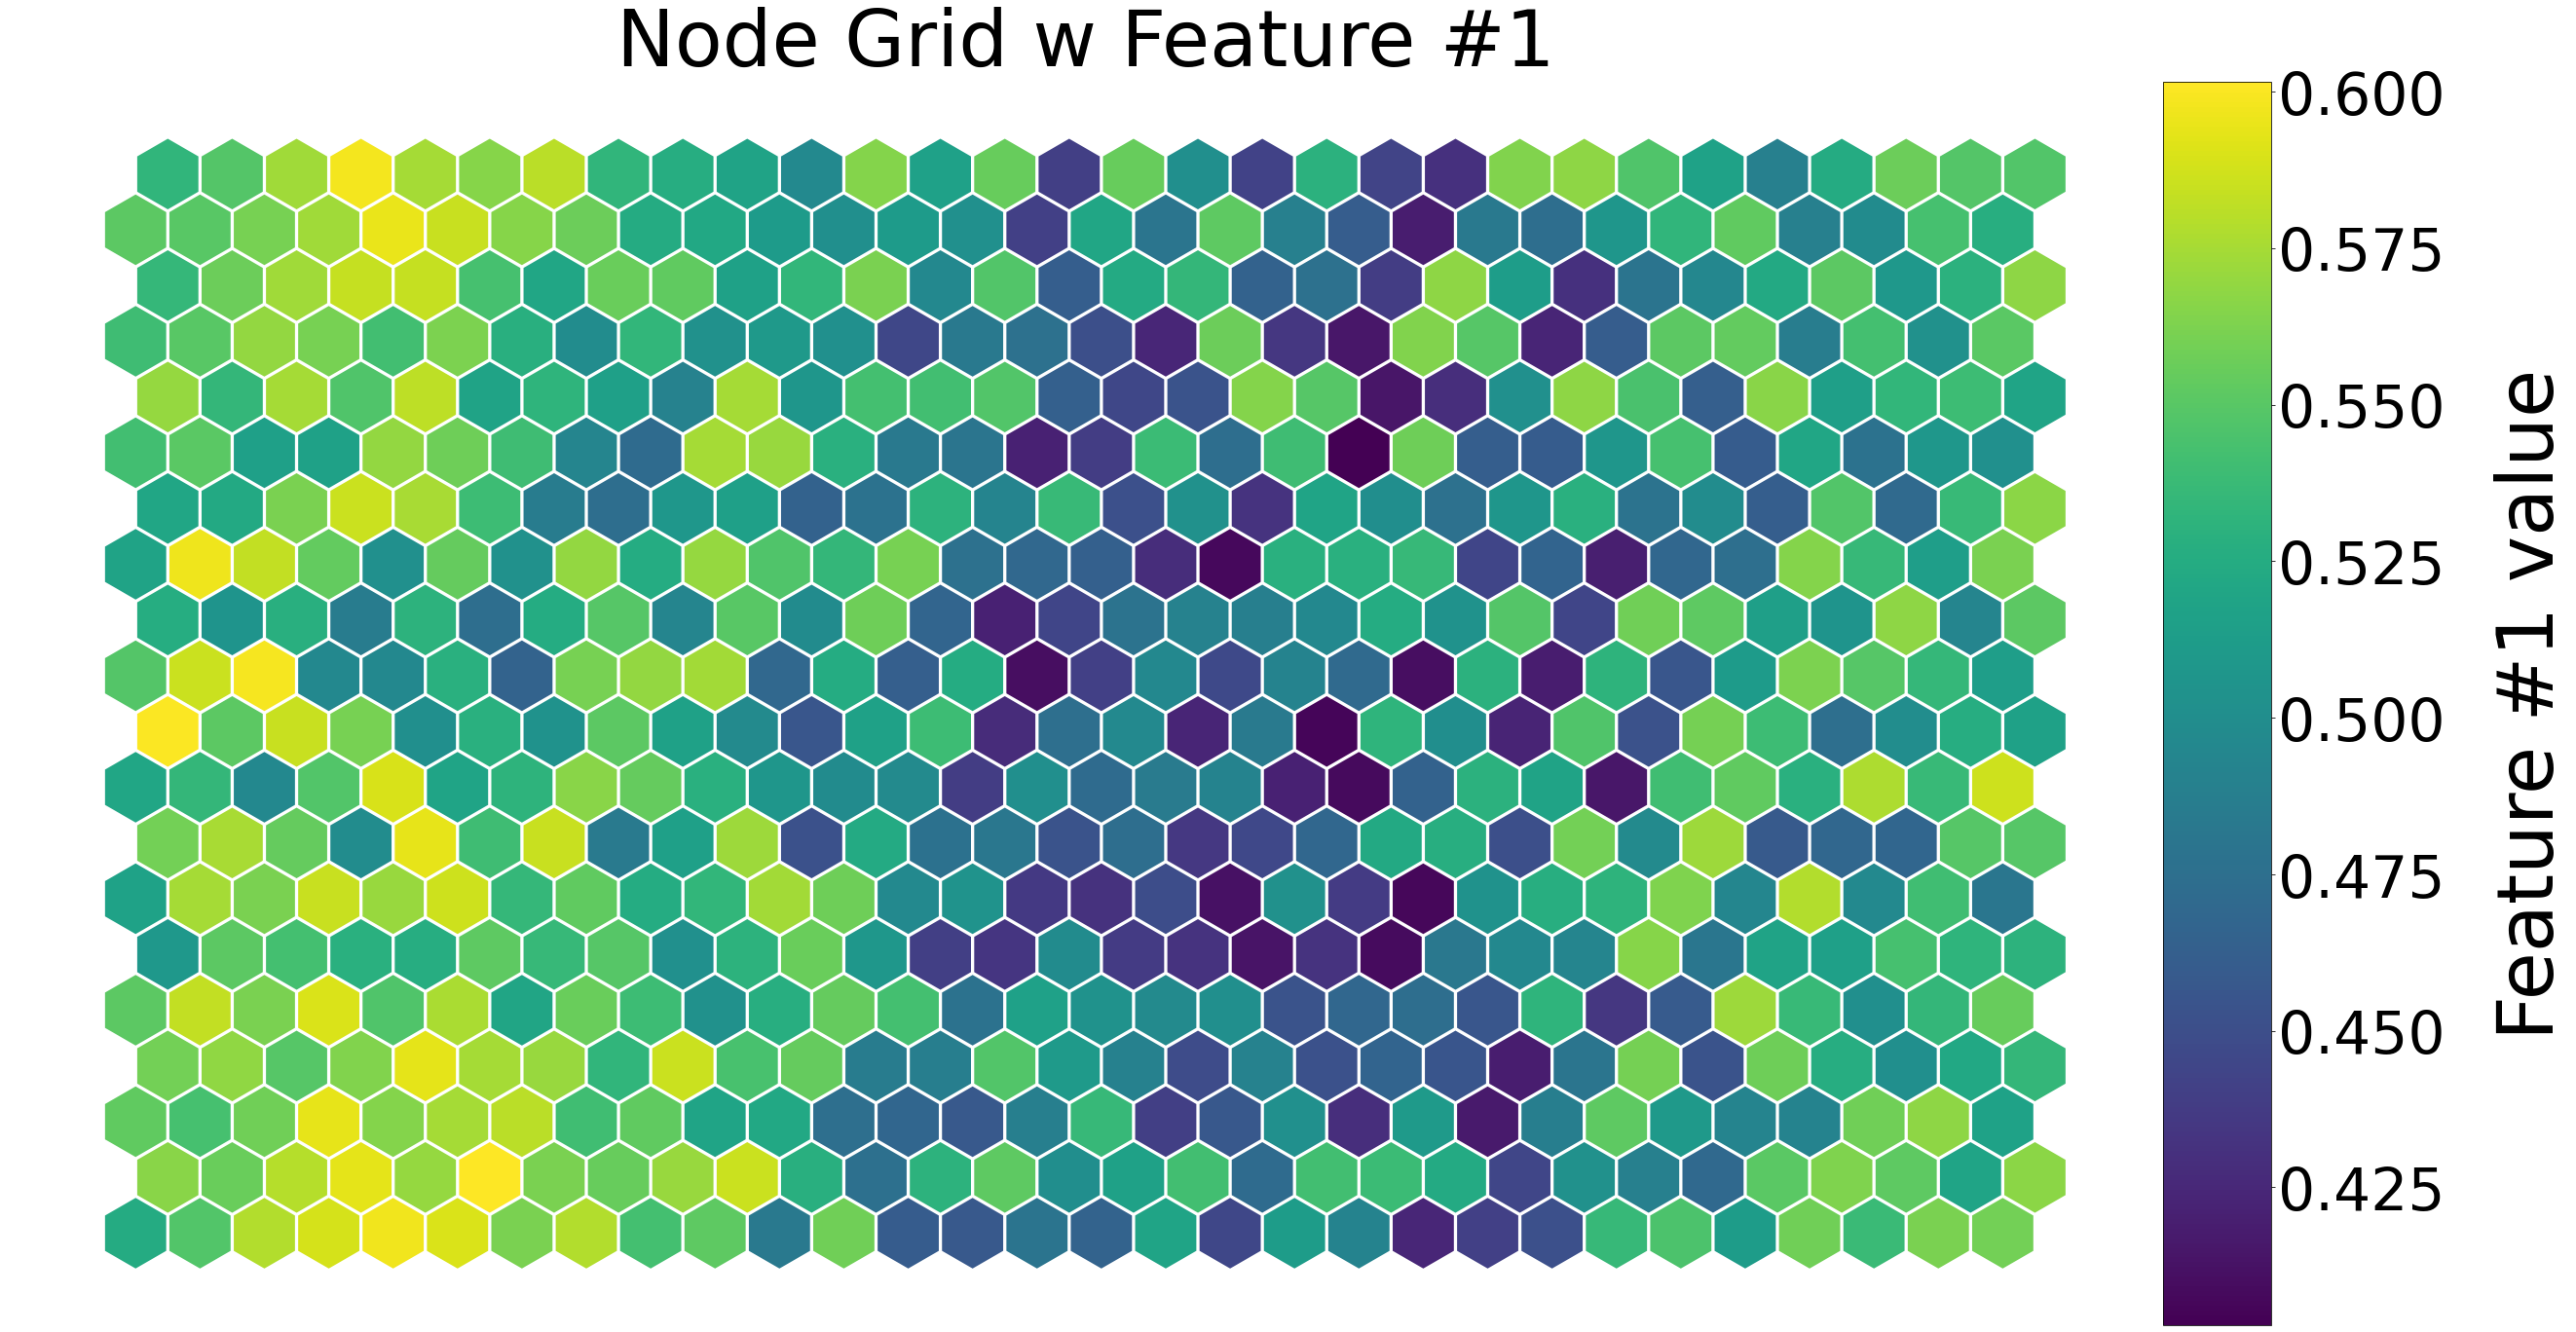

In [98]:
net.nodes_graph(colnum=1)

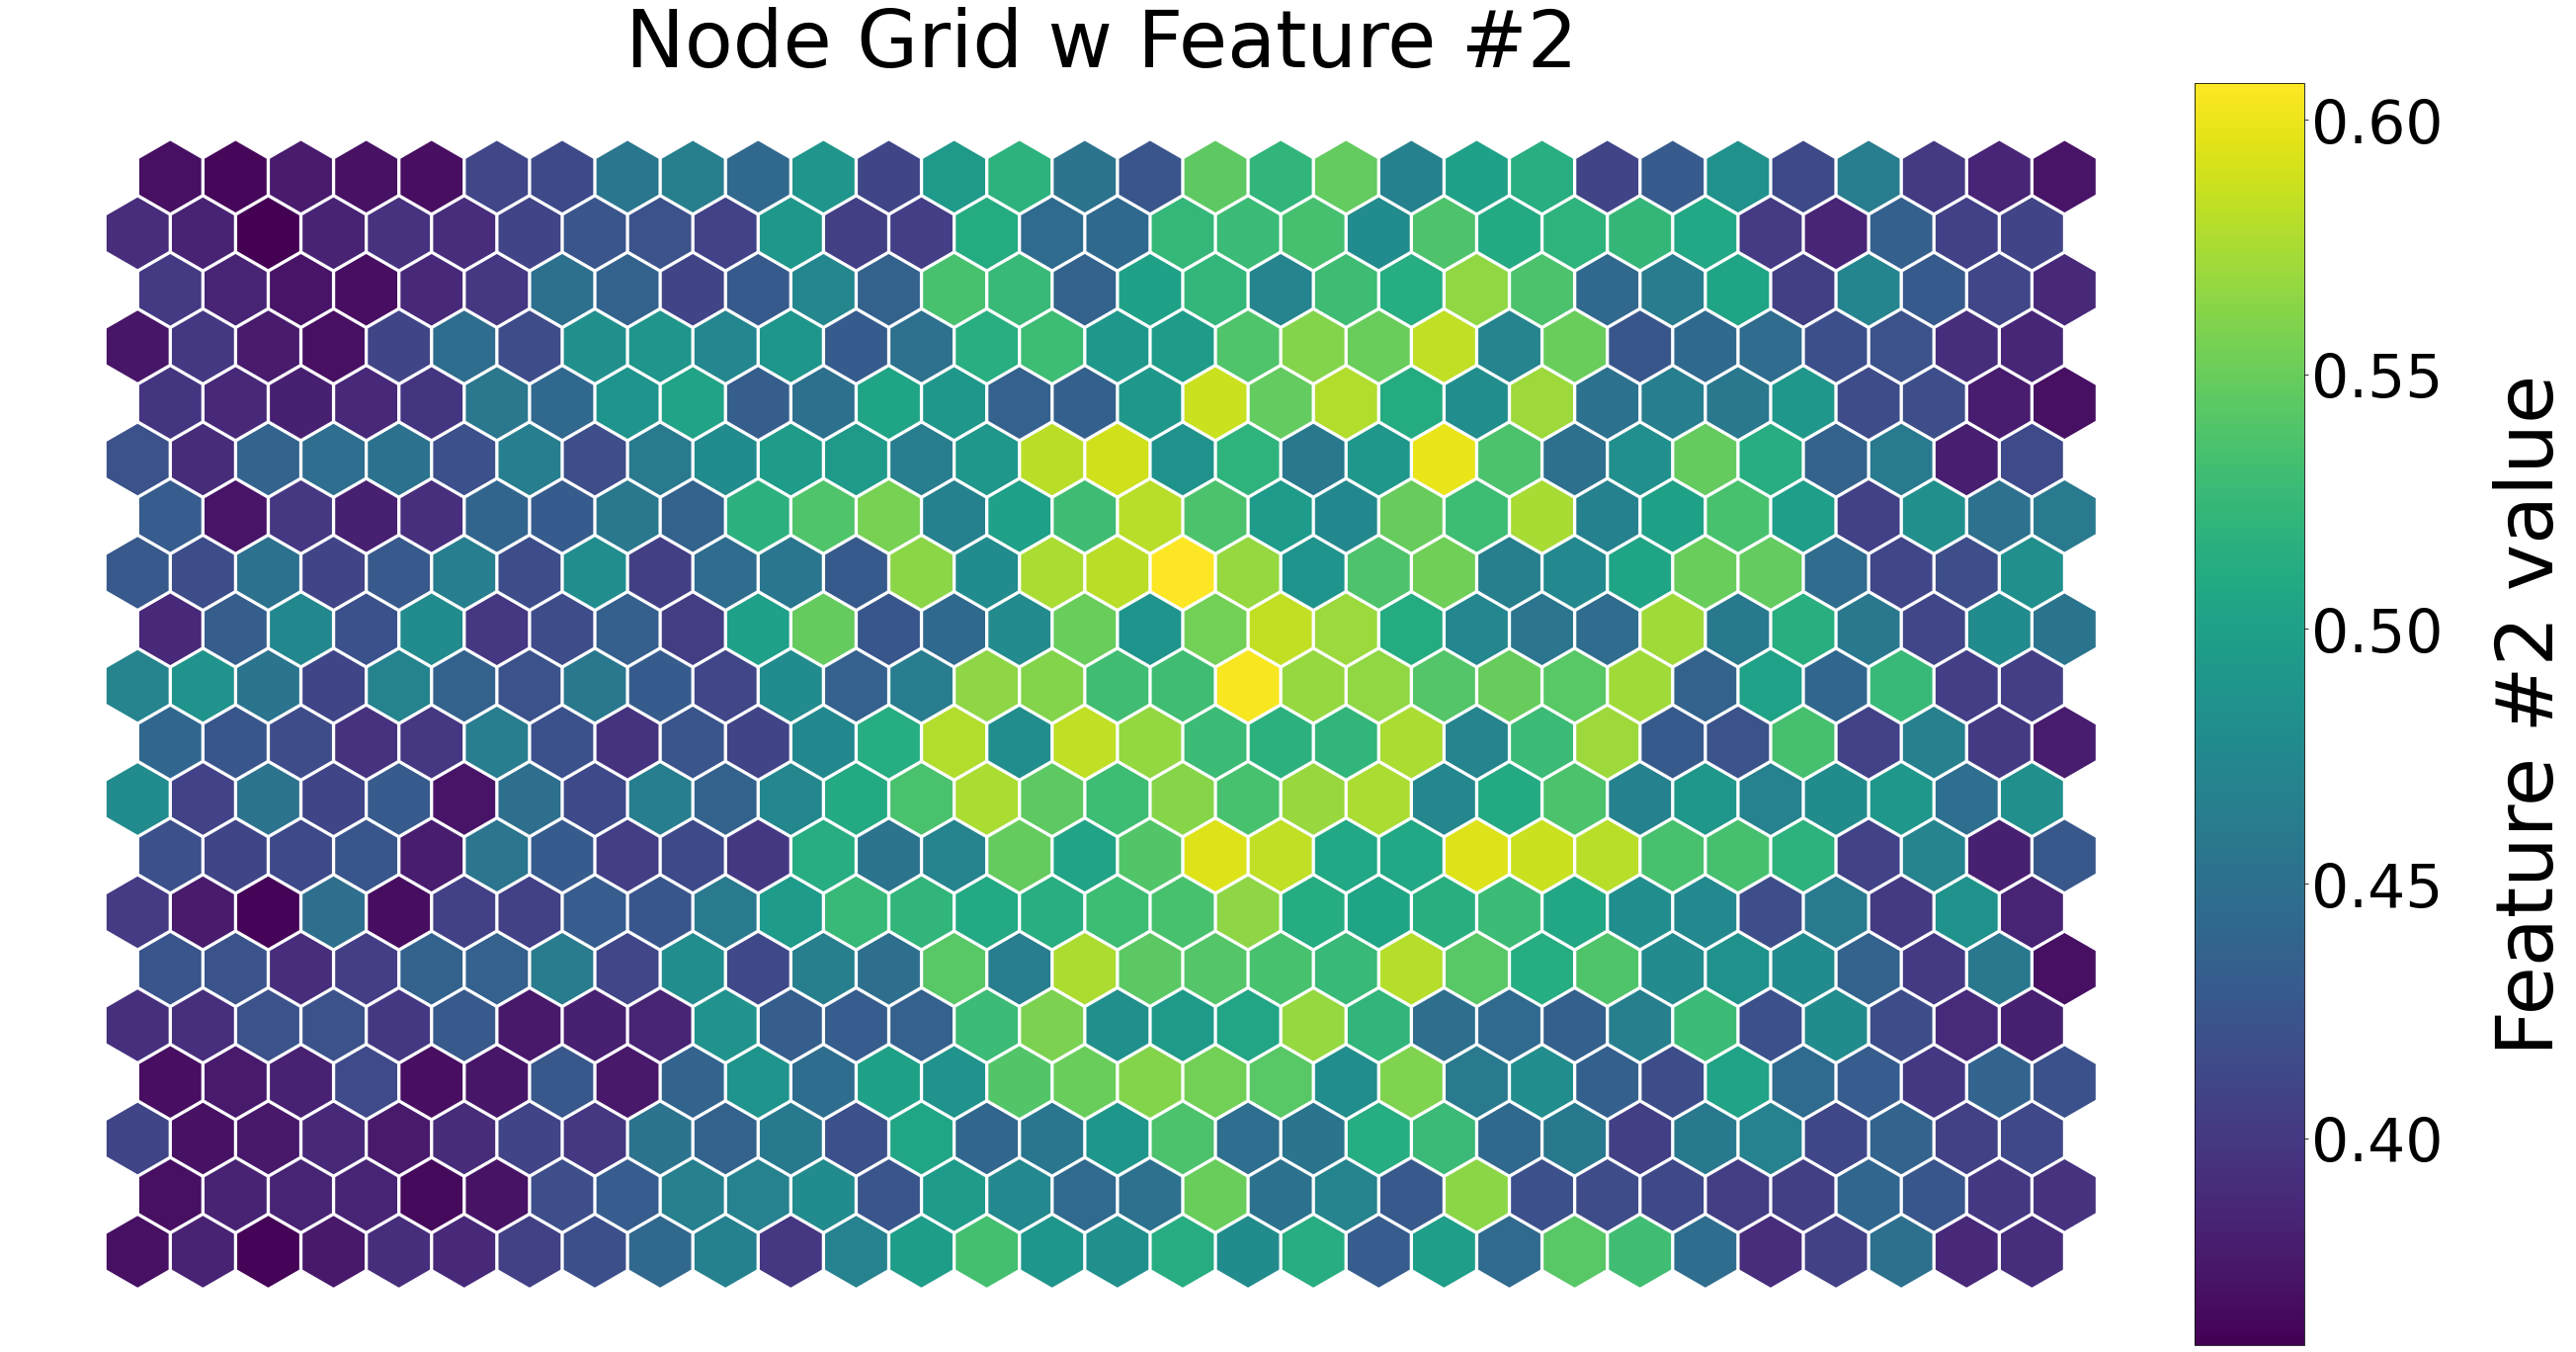

In [99]:
net.nodes_graph(colnum=2)

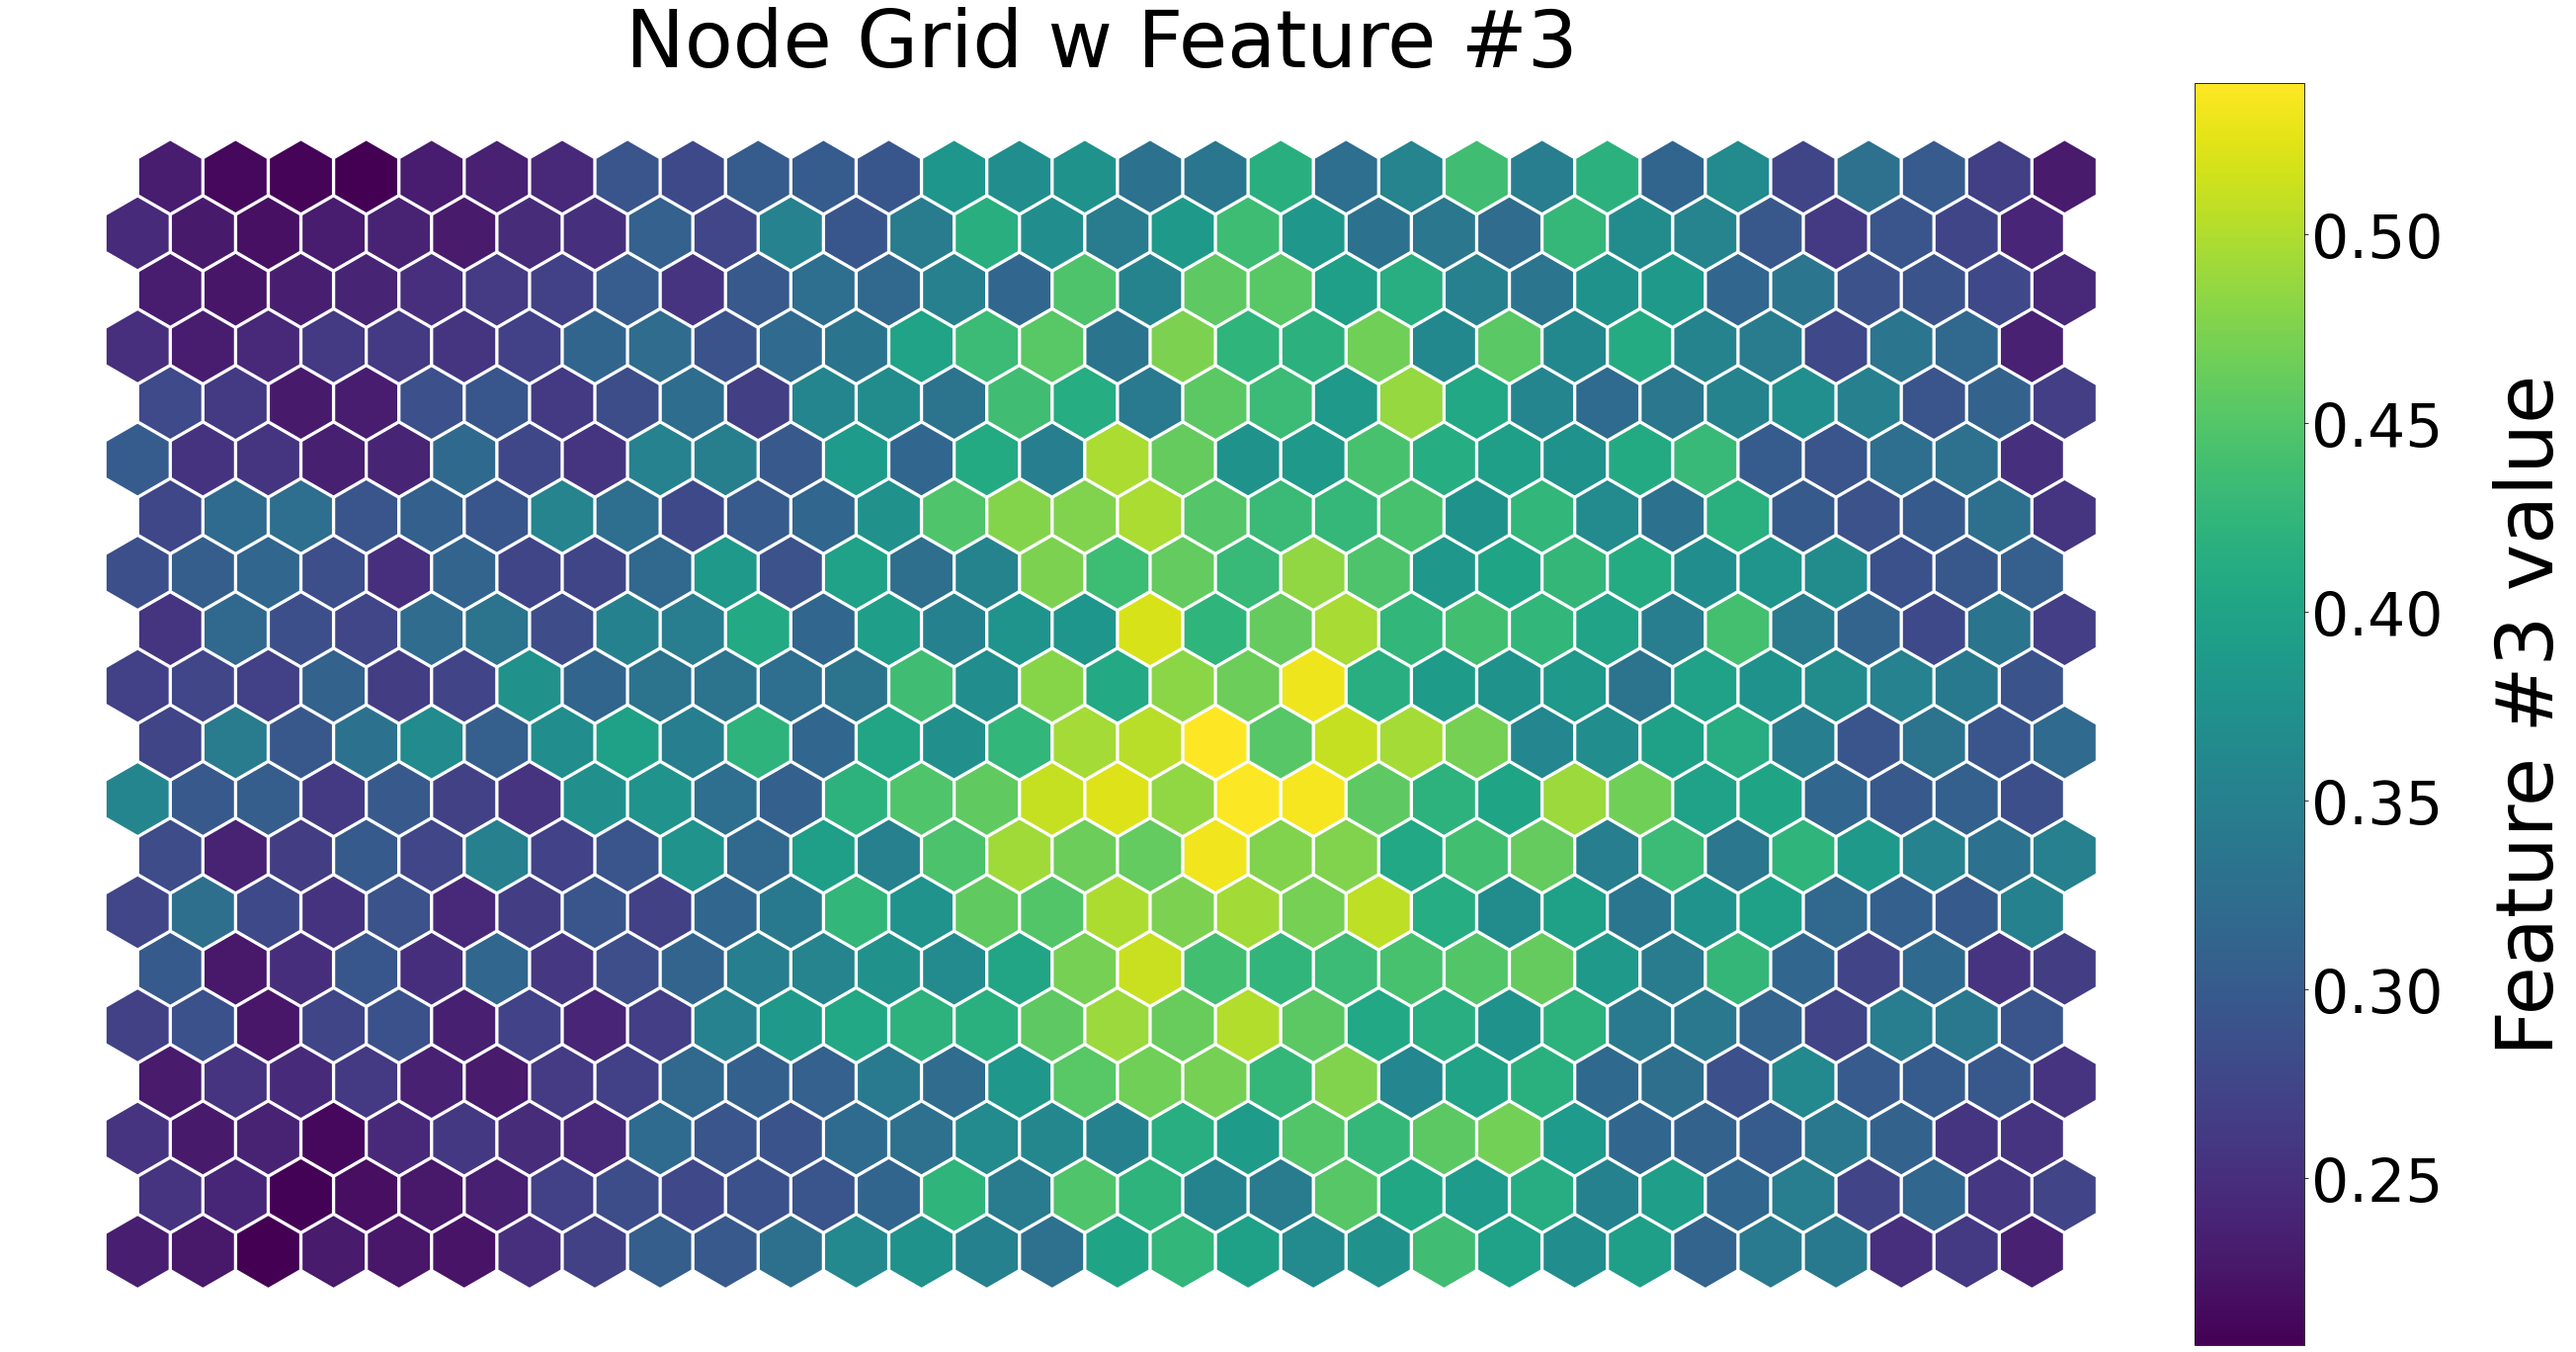

In [100]:
net.nodes_graph(colnum=3)

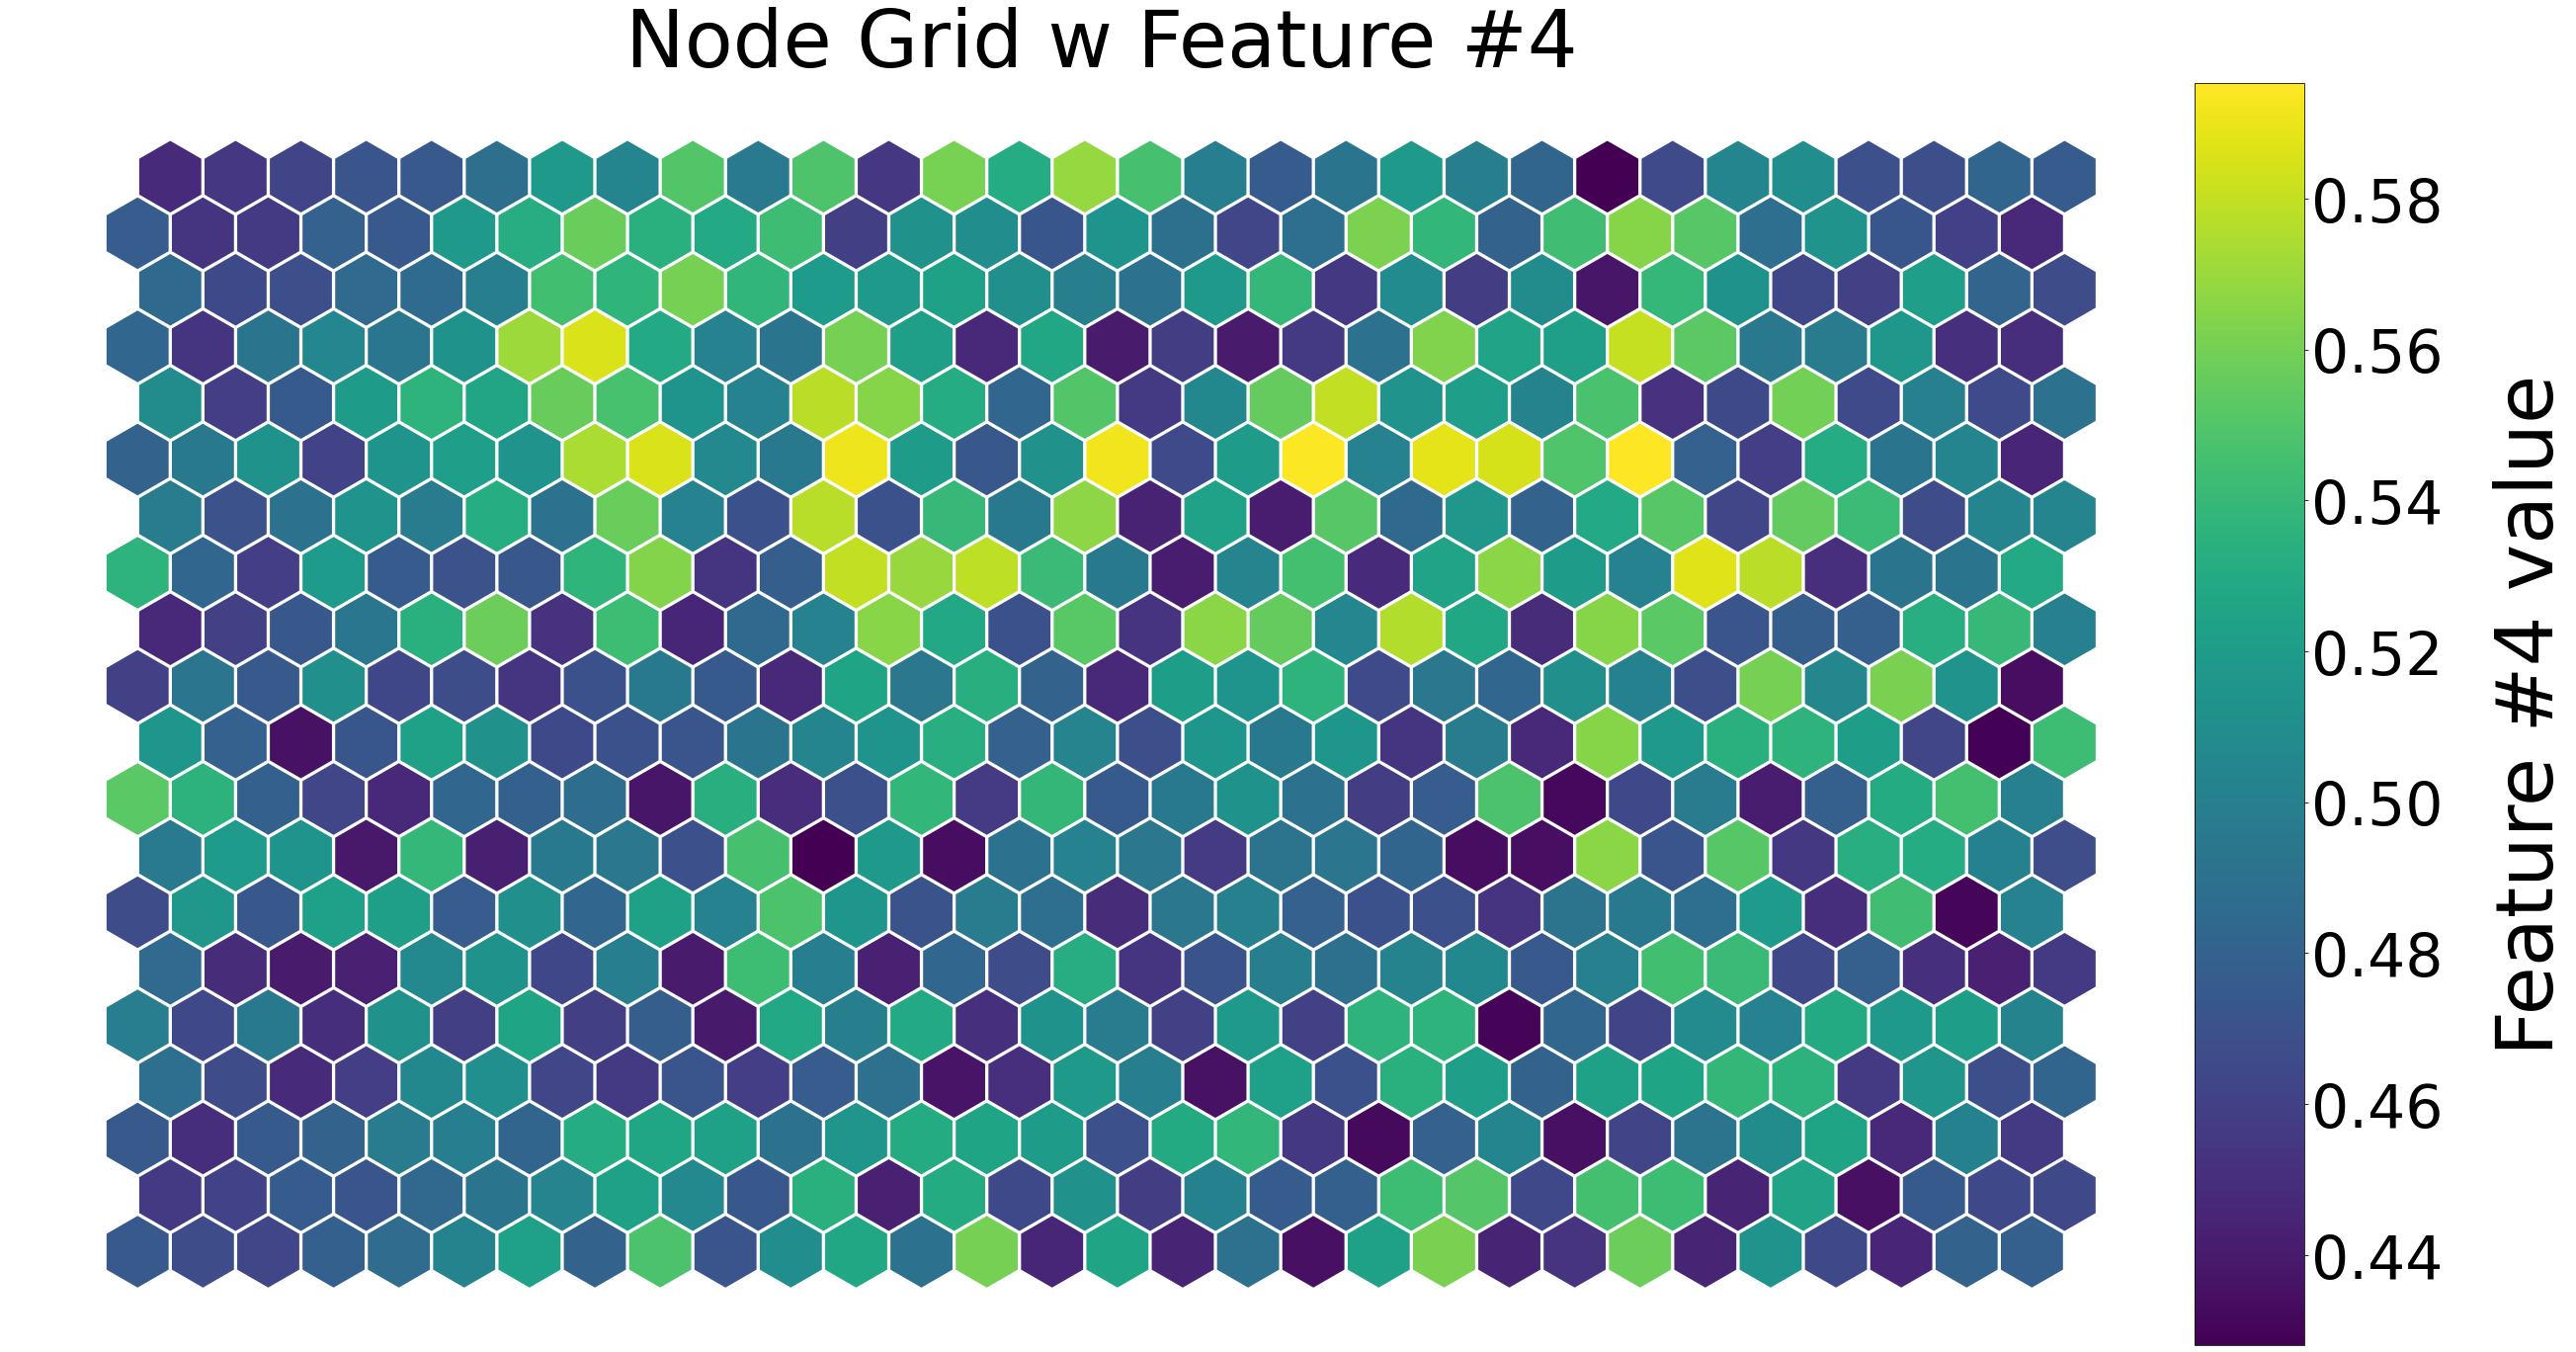

In [101]:
net.nodes_graph(colnum=4)

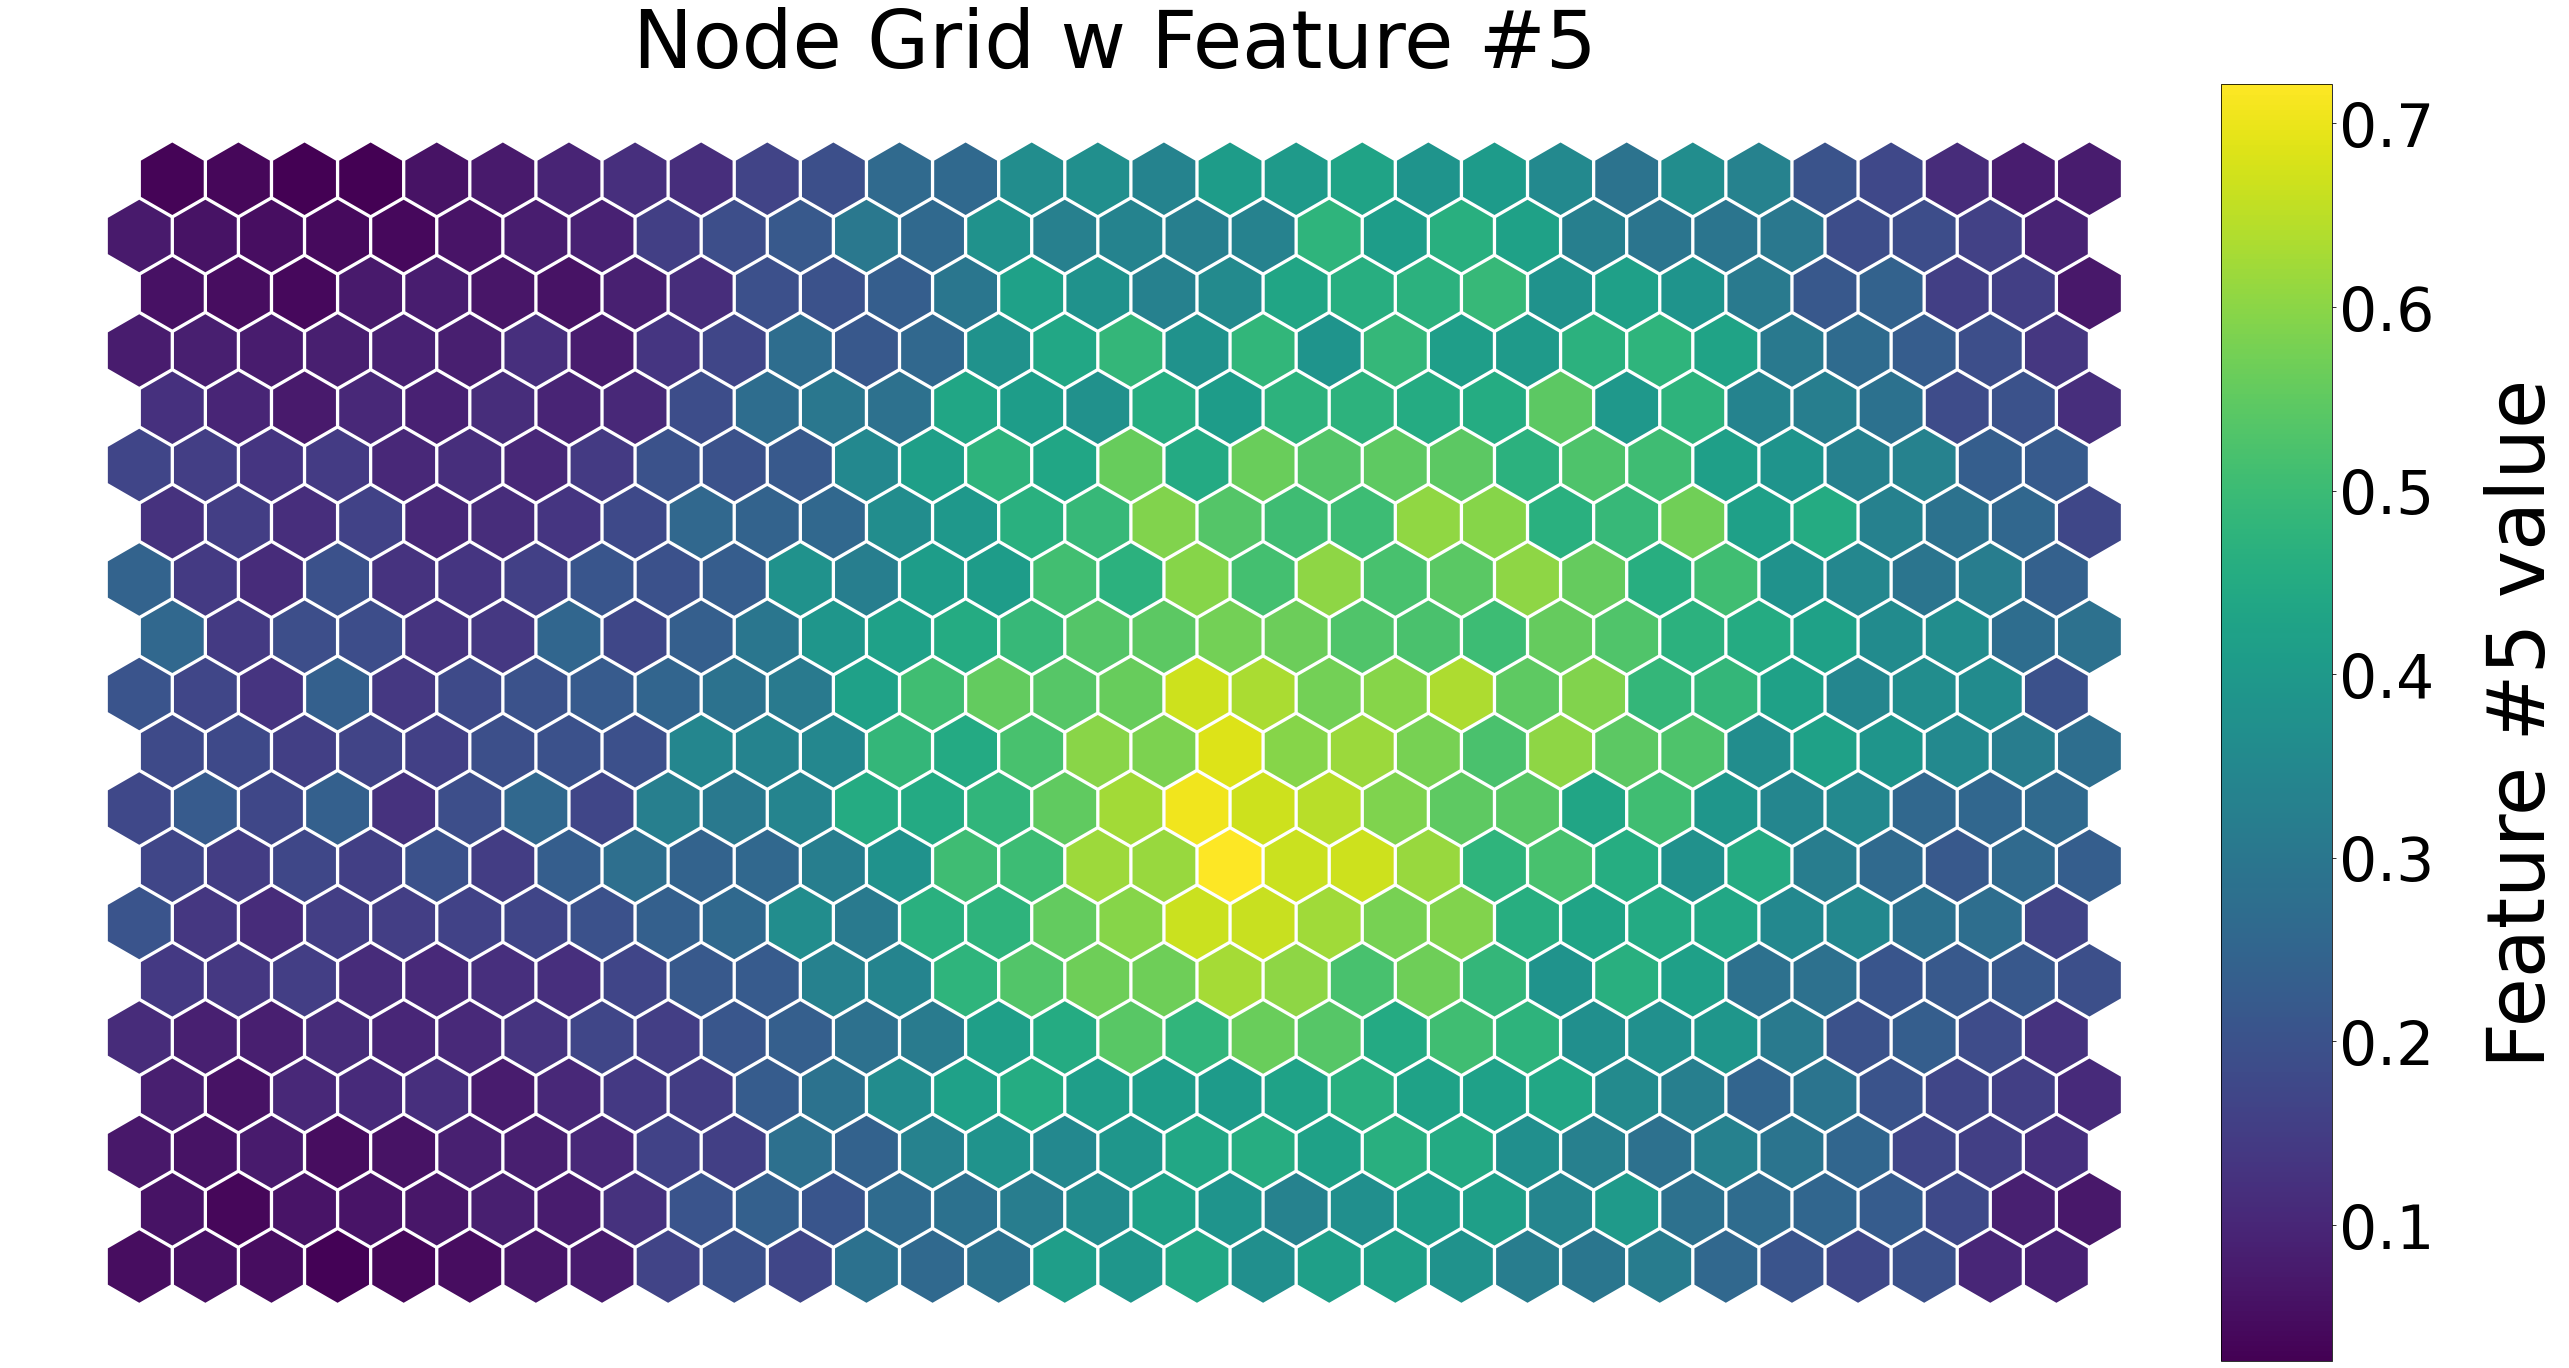

In [102]:
net.nodes_graph(colnum=5)

Построим карту удаленности весов, чтобы принять решение о количестве используемы кластеров.

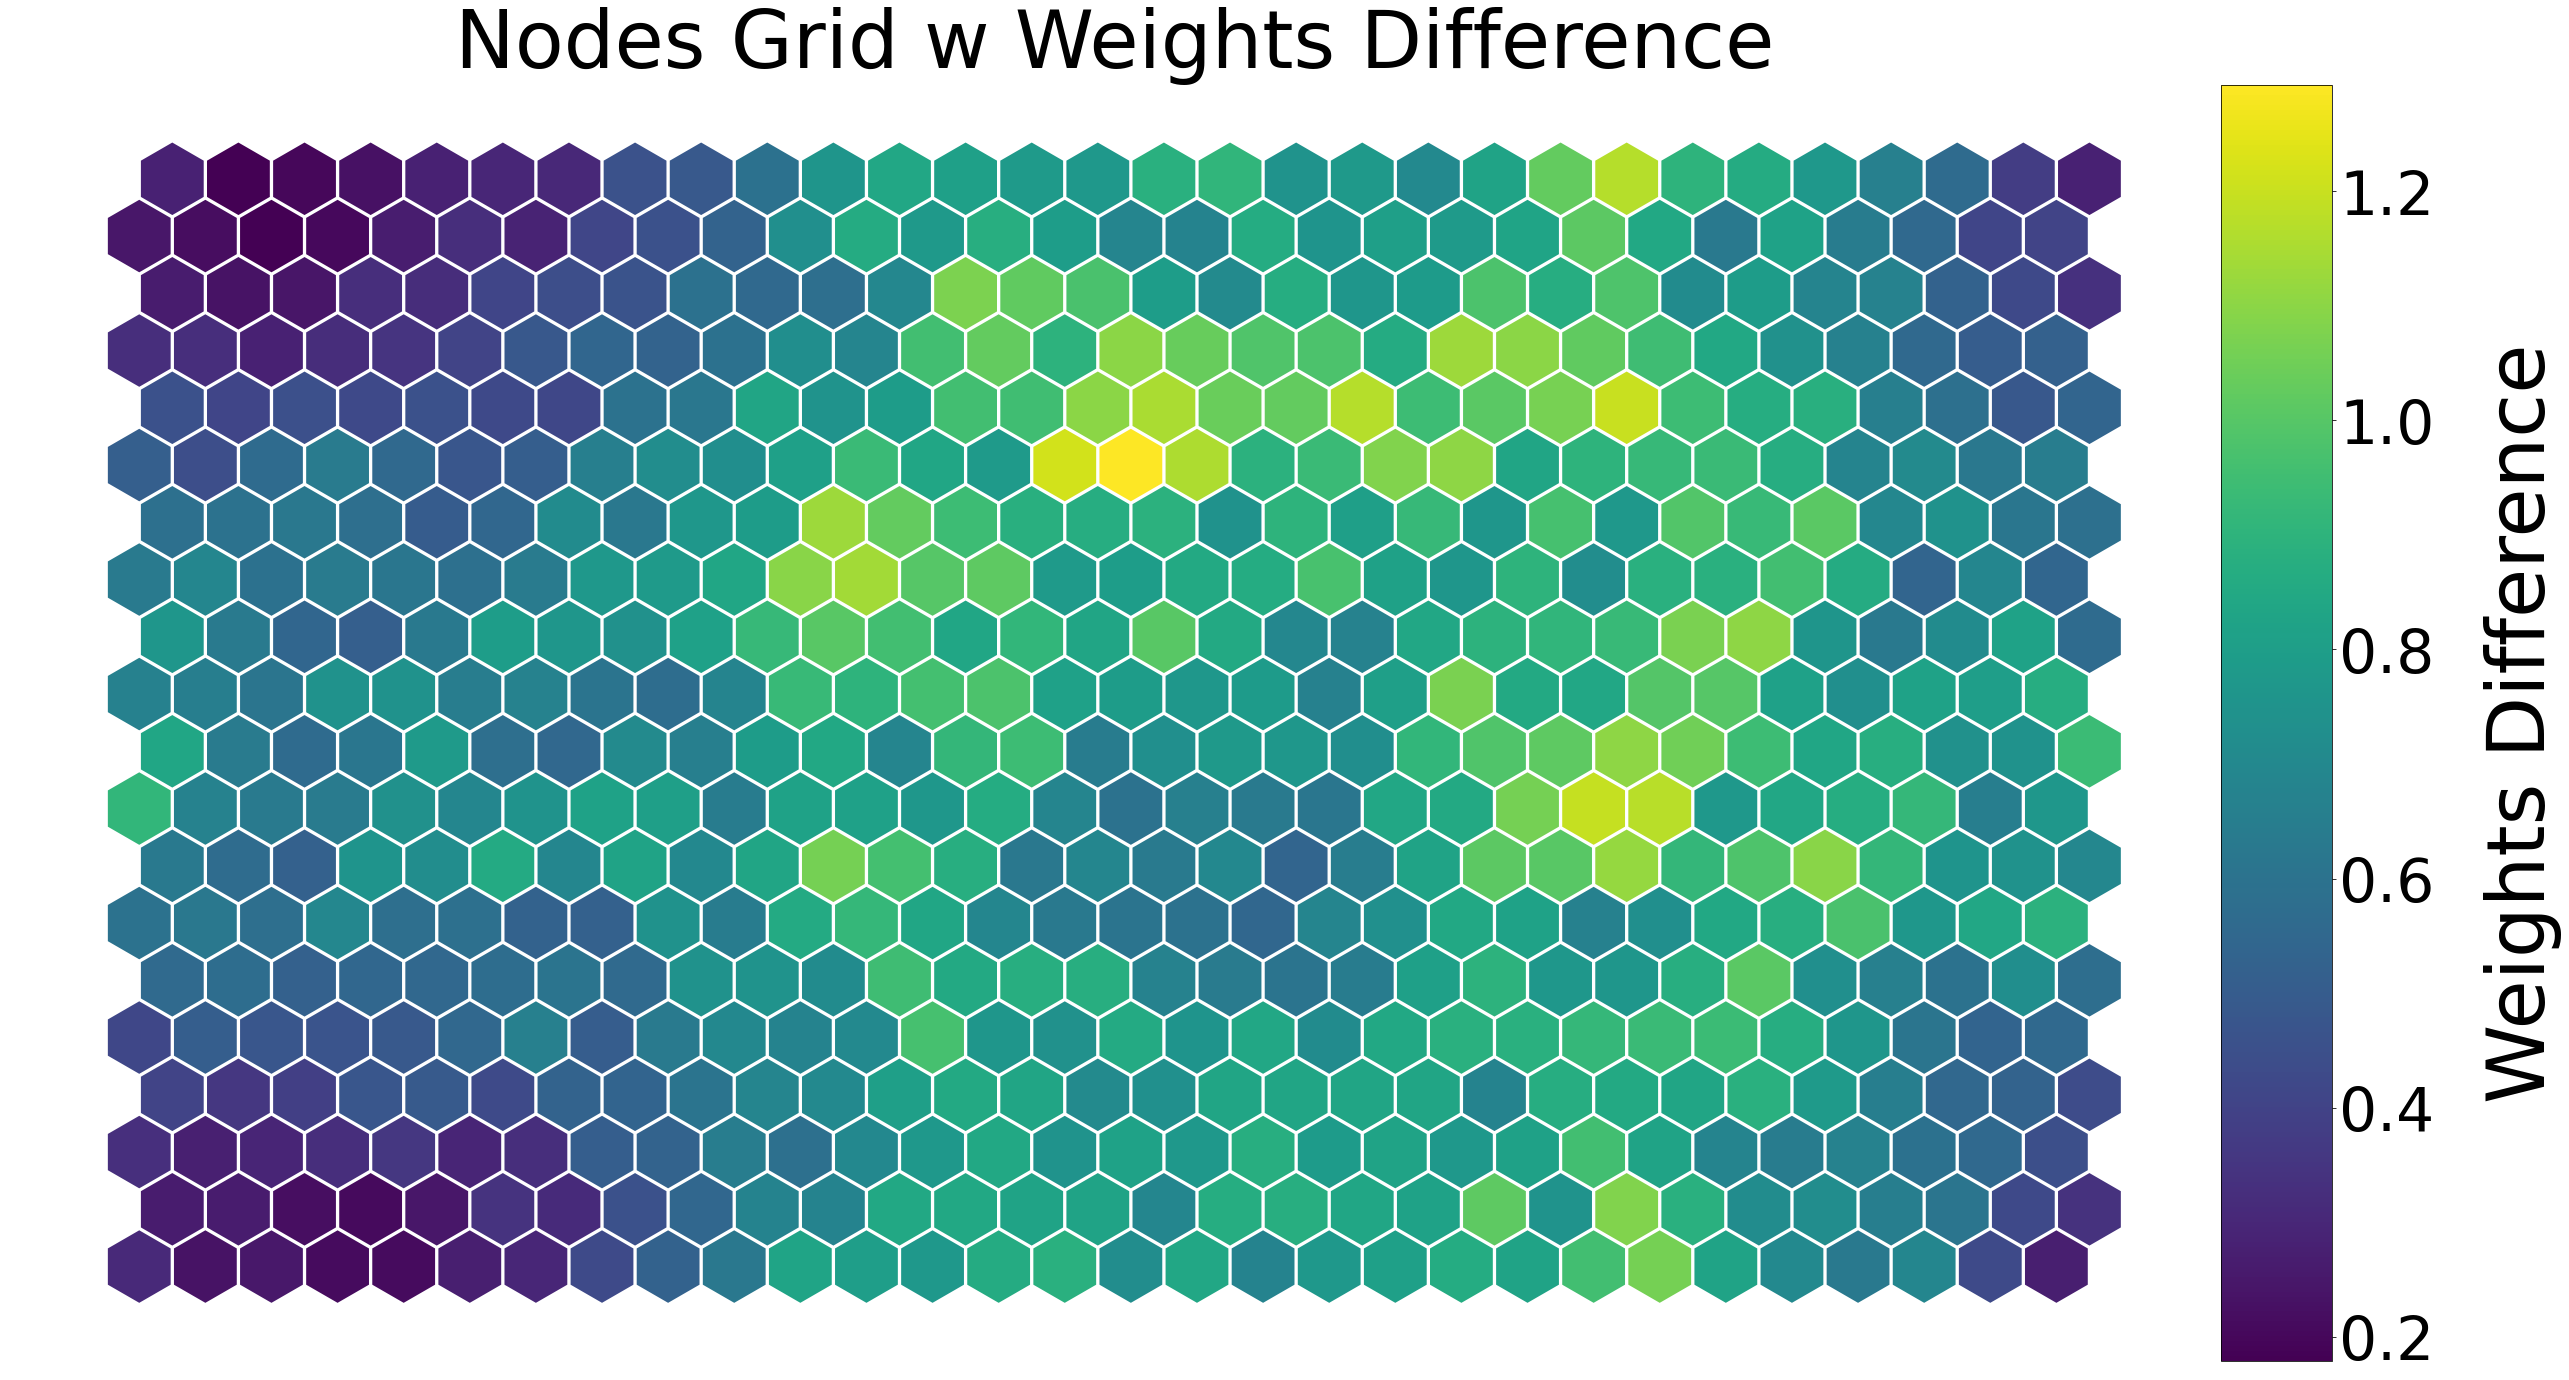

In [103]:
net.diff_graph()

Изобразим узлы карты

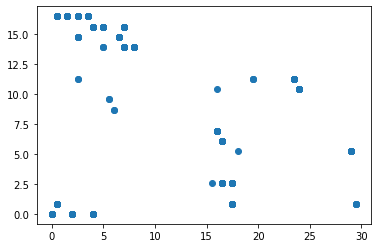

In [104]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Применим к карте алгоритм К-средних, выделив 4 кластера и подав на обучение нашу карту.

In [114]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

Наконец сопоставим алгоритм К-средних с сетями Кохонена. Результаты пересекаются на 76%, что говорит о том, что мы можем выделять 4 кластера.

In [115]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7630767955842679

В итоге описанные кластреры по модели к-средних сопоставимы с картами Кохонена, результаты совпадают на 76%. Результат не сильно высокий, однако я считаю, что для данного набора данных он является приемлемым.